# Importing Libraries

In [3]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.
C:\Users\harik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\harik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\harik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\harik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# Training and Testing Dataset

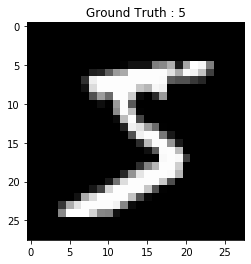

In [4]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

# Converting shape

In [5]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)


# Performing Scaling and One-Hot Encoding

In [6]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Adding dense layers and Evaluating loss and accuracy on train data and test data

In [7]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))
[train_loss, train_acc] = model.evaluate(train_data, train_labels_one_hot)
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
print("Evaluation result on Train Data : Loss = {}, accuracy = {}".format(train_loss, train_acc))
print(history.history.keys())


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 132us/step - loss: 0.2692 - accuracy: 0.9174 - val_loss: 0.1314 - val_accuracy: 0.9581
Epoch 2/5
60000/60000 [==============================] - 8s 134us/step - loss: 0.0917 - accuracy: 0.9710 - val_loss: 0.0924 - val_accuracy: 0.9701
Epoch 3/5
60000/60000 [==============================] - 8s 133us/step - loss: 0.0585 - accuracy: 0.9820 - val_loss: 0.0931 - val_accuracy: 0.9719
Epoch 4/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.0403 - accuracy: 0.9874 - val_loss: 0.0631 - val_accuracy: 0.9821
Epoch 5/5
10000/10000 [==============================] - 1s 107us/step
Evaluation result on Test Data : Loss = 0.0812852791627447, accuracy = 0.977400004863739
Evaluation result on Train Data : Loss = 0.022369637818840542, accuracy = 0.9928500056266785
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


# History for accuracy

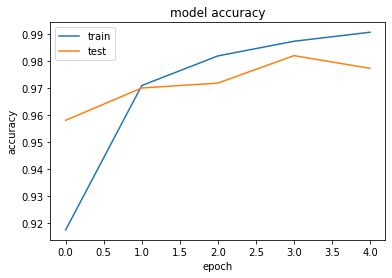

In [8]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# History for loss

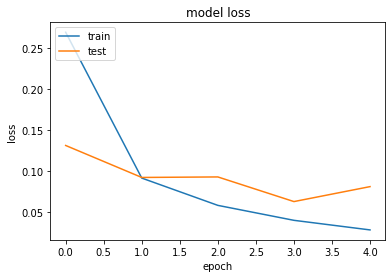

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()